##### The Poisson Distribution

The `Poisson` distribution (named after a man named *Poisson*, it's not
about fish) describes the number of things in any part of a stochastic process
where the locations of things are stochastically independent (one are affected
by any of the others).  Examples would be the number of winners of a lottery,
the number of raisins in a slice of carrot cake, the number of red blood cells
in a drop of blood, the number of visible stars in a region of the sky,
the number of traffic accidents in Minneapolis today.  It doesn't matter
what is counted, so long as the thingummies counted have nothing to do with
each other, you get the Poisson distribution.


Its PMF is
$$
   f(x) = \frac{\mu^x e^{- \mu}}{x !}, \qquad x = 0, 1, 2, \ldots,
$$
where $\mu$ can be any positive real number (more on this later).

The fact that probabilities sum to one is a special case of
the Maclaurin series (Taylor series around zero) of the exponential function
$$
   e^\mu = \sum_{x = 0}^\infty \frac{\mu^x}{x!}
$$
Here the sample space is infinite, so the fact that probabilities sum to
one involves an infinite series.


### Example1: Business Custommer.

A small business have a business-tracks of business customer per day. (will be generate by us because we do not have it now)

What is the probability that the business will receive eactly 8 customers in one day ?

In [2]:
import pandas as pd
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# First we simulate the bussiness-track-customers, for example mean = 12

x_rvs = poisson.rvs(12, size=100000, random_state=2)

In [4]:
x_rvs.mean()

11.9844

In [5]:
x_rvs_serie = pd.Series(x_rvs)
data = x_rvs_serie.value_counts()
data[:10]

12    11468
11    11329
10    10546
13    10362
14     9099
9      8879
15     7293
8      6601
16     5340
7      4335
dtype: int64

In [6]:
data_dic = x_rvs_serie.value_counts().sort_index().to_dict()
print(data_dic)

{0: 1, 1: 9, 2: 53, 3: 175, 4: 559, 5: 1302, 6: 2560, 7: 4335, 8: 6601, 9: 8879, 10: 10546, 11: 11329, 12: 11468, 13: 10362, 14: 9099, 15: 7293, 16: 5340, 17: 3781, 18: 2596, 19: 1607, 20: 942, 21: 570, 22: 282, 23: 154, 24: 88, 25: 31, 26: 17, 27: 11, 28: 5, 29: 3, 30: 1, 31: 1}


<BarContainer object of 32 artists>

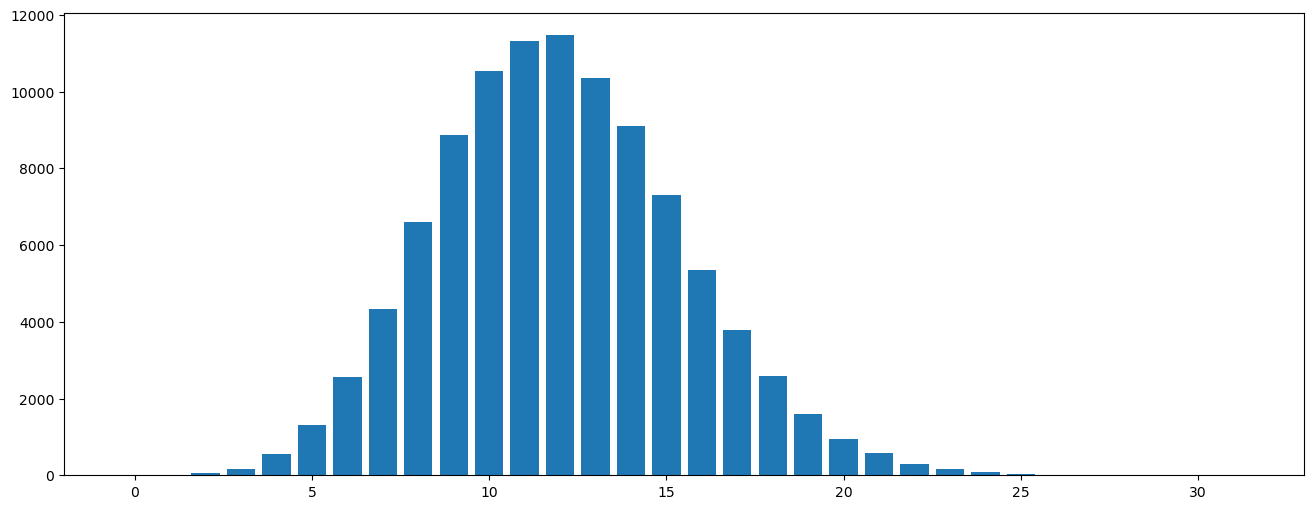

In [7]:
fix, ax = plt.subplots(figsize=(16, 6))
ax.bar(range(len(data_dic)), list(data_dic.values()), align="center")

**Formula:**

$
\begin{aligned}
f(x) = \frac{\mu^x e^{- \mu}}{x !}, \qquad x = 0, 1, 2, \ldots,
\end{aligned}
$

In [8]:
# Apply formula
# p(X=x), so in our case x=8 we want to know the exactly number of clients
def poisson_pmf(k, lam):
    return round(((lam ** k * np.exp(-lam)) / np.math.factorial(k)) * 100, 2)

In [9]:
k = 8
lam = x_rvs.mean()
print(f"Probability of have exactly {k} customers folling spoisson distribution is {poisson_pmf(k, lam)} %")

Probability of have exactly 8 customers folling spoisson distribution is 6.59 %


Instead of using our already programmed formula we use the one given by scipy.

In [10]:
print(f"Probability of have exactly {k} customers folling spoisson distribution is {poisson.pmf(k, lam) * 100} %")

Probability of have exactly 8 customers folling spoisson distribution is 6.586444778980663 %


#### Example 2.

A student receives, on average 7 text messages in a 2 hour preiord.

What is the probability that the studen will receive exactly 9 text messages in a 2 hour preiod ?


In [11]:
print(round(poisson.pmf(9, 7) * 100, 2), "%")

10.14 %


What is the probability that the student will receive eactly 24 text messages in an 8 hour period.

In [12]:
print(round(poisson.pmf(24, 28) * 100, 2), "%")

6.01 %


#### Example 3

A small business receives, on average 8 calls per hour

a) What is the probability that the business will receive exactly 7 calls in 1 hour ?

In [14]:
print(round(poisson.pmf(7, 8) * 100, 2), "%")

13.96 %


b) What is the probability that the business will receive, at most, 5 calls in one hour?


In [15]:
# P(x=0) + (x=1) + (x=2) + (x=3) + (x=4) + (x=5)
sum_pois = 0

for poison_x in range(0, 6):
    sum_pois += poisson.pmf(poison_x, 8)

print(round(sum_pois * 100, 2), "%")

19.12 %


c) What is the probability tha the business will receive more than 6 calls in one hour ?


1 - (P(x=6) + P(x=5) + P(x=4) + P(x=3) + P(x=2) + P(x=1) + P(x=0 ))


$ 1 - \sum_{x = 0}^{6} P(X=x)$

In [25]:
total = 0
for k in range(0, 7):
    total += poisson.pmf(k, 8) 

total_correct = 1 - total

print(round( total_correct * 100, 2))

68.66
